In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [132]:
school_data = pd.read_csv('data/School/school_data_2021-2022_cleaned.csv')
school_data_21 = pd.read_csv('data/School/school_data_2020-2021_cleaned.csv')

In [133]:
housing_data = pd.read_csv('data/HousingPrice/HousingPriceCleaned/profiled_data.csv')
housing_data['Short Post Code'] = housing_data['Post Code'].str.split().str[0]
housing_data = housing_data[['District','Short Post Code','County','Price']]
housing_data = housing_data.drop_duplicates(subset='Short Post Code') 

school_data['Short Post Code'] = school_data['Post Code'].str.split().str[0]
school_data = school_data.drop_duplicates(subset='Short Post Code')  

school_data_merged = housing_data.merge(school_data, on='Short Post Code', how='inner')
school_data_merged.head(100)

,District,Short Post Code,County,Price,Post Code,School,Attained,Year
0,LEEDS,LS8,WEST YORKSHIRE,283334,LS8 1ND,Roundhay School,52.8,2022
1,WAKEFIELD,WF4,WEST YORKSHIRE,202500,WF4 1NF,Crofton Academy,49.1,2022
2,KIRKLEES,WF13,WEST YORKSHIRE,78000,WF13 4LL,St John Fisher Catholic Voluntary Academy,37.9,2022
3,KIRKLEES,WF12,WEST YORKSHIRE,135000,WF12 9NG,Institute of Islamic Education,59.3,2022
4,BRADFORD,LS29,WEST YORKSHIRE,110400,LS29 8TR,Ilkley Grammar School,62.7,2022
...,...,...,...,...,...,...,...,...
95,HARROGATE,YO26,NORTH YORKSHIRE,960000,YO26 9SS,The Faculty of Queen Ethelburga's,44.0,2022
96,HAMBLETON,DL6,NORTH YORKSHIRE,195000,DL6 1ED,Northallerton School & Sixth Form College,42.9,2022
97,CHERWELL,OX25,OXFORDSHIRE,351000,OX25 5HD,Heyford Park School,54.4,2022
98,SOUTH OXFORDSHIRE,OX33,OXFORDSHIRE,595000,OX33 1QH,Wheatley Park School,53.8,2022


In [134]:
school_data_21['Short Post Code'] = school_data_21['Post Code'].str.split().str[0]
school_data_21 = school_data_21.drop_duplicates(subset='Short Post Code')  

school_data_merged_21 = housing_data.merge(school_data_21, on='Short Post Code', how='inner')
school_data_merged_21.head(100)

,District,Short Post Code,County,Price,Post Code,School,Attained,Year
0,LEEDS,LS8,WEST YORKSHIRE,283334,LS8 1ND,Roundhay School,52.8,2021
1,WAKEFIELD,WF4,WEST YORKSHIRE,202500,WF4 1QG,Wakefield Independent School,47.1,2021
2,KIRKLEES,WF13,WEST YORKSHIRE,78000,WF13 2JE,Westborough High School,40.6,2021
3,LEEDS,LS7,WEST YORKSHIRE,660000,LS7 4JE,New Horizon Community School,15.2,2021
4,KIRKLEES,WF12,WEST YORKSHIRE,135000,WF12 7DW,Manor Croft Academy,52.1,2021
...,...,...,...,...,...,...,...,...
95,CRAVEN,BD22,NORTH YORKSHIRE,130000,BD22 7DU,Beckfoot Oakbank,38.1,2021
96,HARROGATE,YO26,NORTH YORKSHIRE,960000,YO26 9SS,Queen Ethelburga's College,55.7,2021
97,HAMBLETON,DL6,NORTH YORKSHIRE,195000,DL6 1DD,Northallerton School & Sixth Form College,44.6,2021
98,CHERWELL,OX25,OXFORDSHIRE,351000,OX25 5HD,Heyford Park Free School,47.3,2021


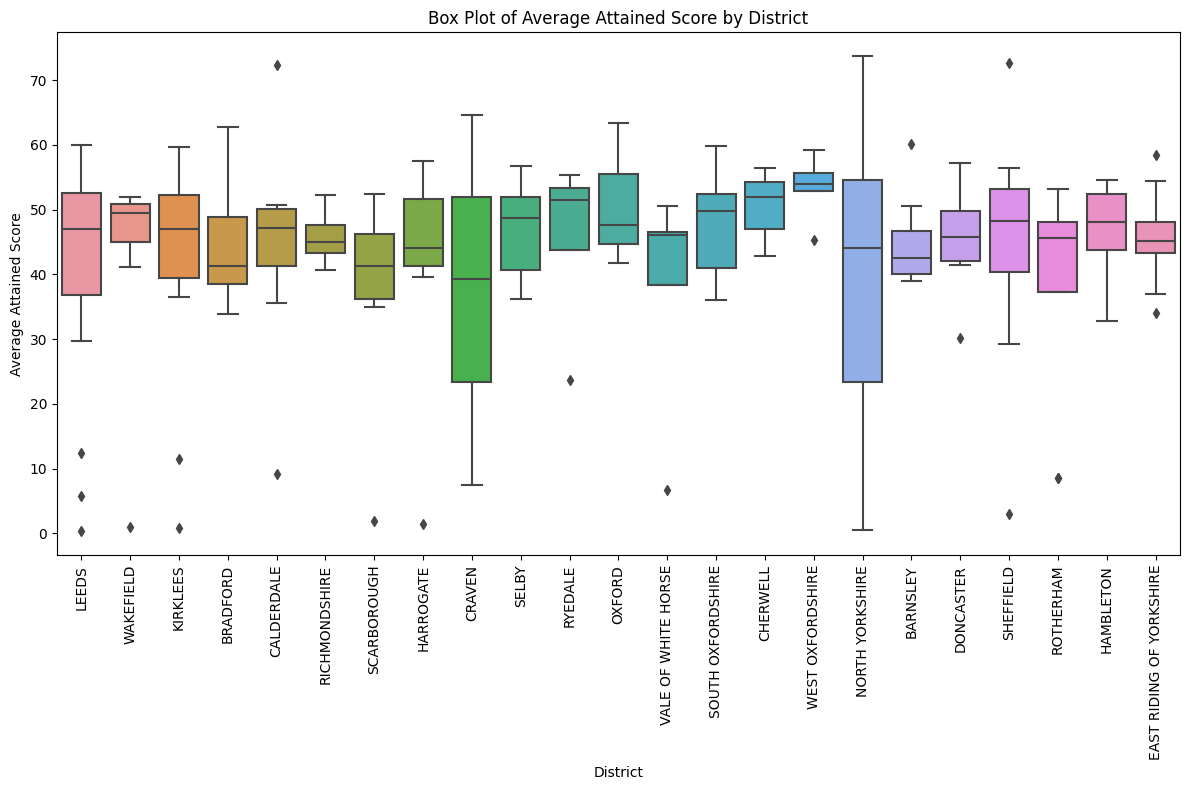

In [135]:
district_avg_attained = school_data_merged.groupby('District')['Attained'].mean()

# Create a box plot using seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(data=school_data_merged, x='District', y='Attained')
plt.xlabel('District')
plt.ylabel('Average Attained Score')
plt.title('Box Plot of Average Attained Score by District')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [136]:
school_data_yk_22 = school_data_merged[school_data_merged['County'].str.contains('Yorkshire',case=False)]
school_data_ox_22 = school_data_merged[school_data_merged['County'].str.contains('Oxford',case=False)]

school_data_yk_21 = school_data_merged_21[school_data_merged_21['County'].str.contains('Yorkshire',case=False)]
school_data_ox_21 = school_data_merged_21[school_data_merged_21['County'].str.contains('Oxford',case=False)]

school_data_concat_yk = pd.concat([school_data_yk_22, school_data_yk_21])
school_data_concat_ox = pd.concat([school_data_ox_22, school_data_ox_21])

In [137]:
'''districts = school_data_concat_yk['District'].unique()

# Plot individual lines for each district
for district in districts:
    district_data = school_data_concat_yk[school_data_concat_yk['District'] == district]
    plt.plot(district_data['Year'], district_data['Attained'], marker='o', label=district)

plt.xlabel('Year')
plt.ylabel('Average Attained')
plt.title('Average Attained by District for Yorkshire in 2021 and 2022')
plt.legend(fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()'''



"districts = school_data_concat_yk['District'].unique()\n\n# Plot individual lines for each district\nfor district in districts:\n    district_data = school_data_concat_yk[school_data_concat_yk['District'] == district]\n    plt.plot(district_data['Year'], district_data['Attained'], marker='o', label=district)\n\nplt.xlabel('Year')\nplt.ylabel('Average Attained')\nplt.title('Average Attained by District for Yorkshire in 2021 and 2022')\nplt.legend(fontsize=10)\nplt.xticks(fontsize=10)\nplt.yticks(fontsize=10)\nplt.tight_layout()\nplt.show()"

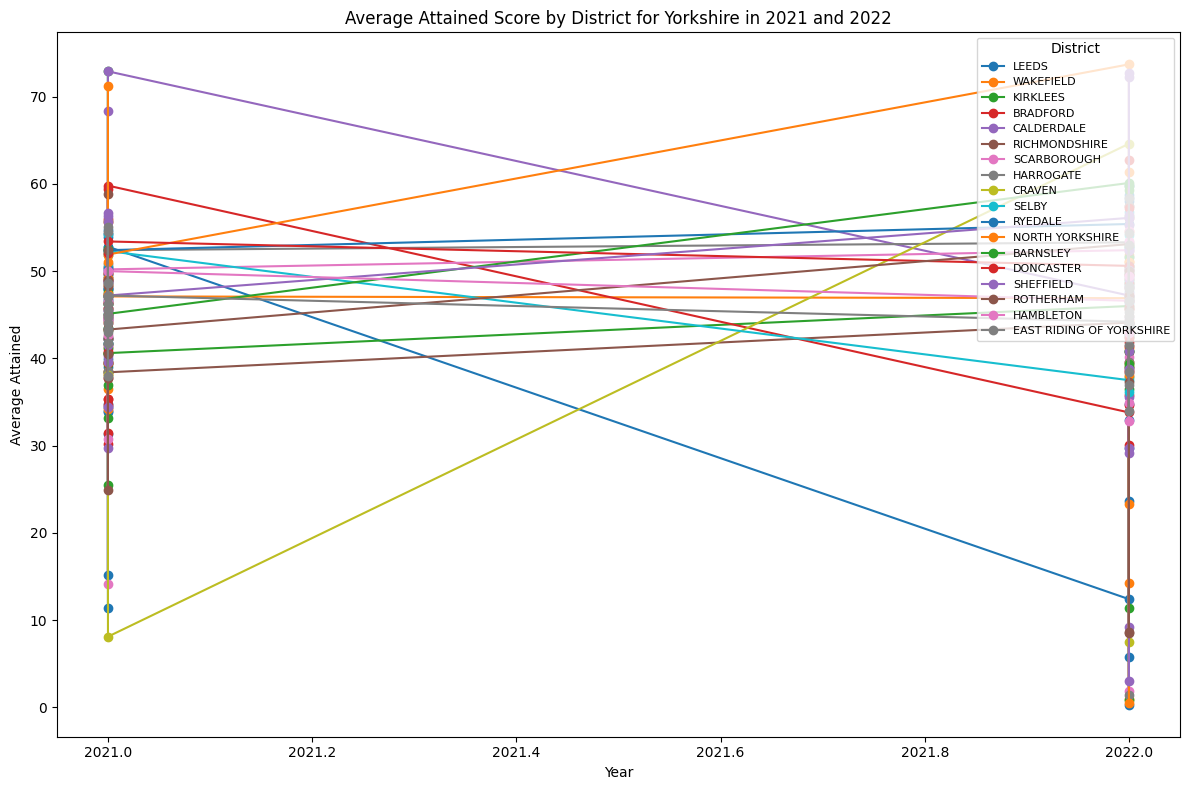

In [204]:
plt.figure(figsize=(12, 8))
for district in school_data_concat_yk['District'].unique():
    district_data = school_data_concat_yk[school_data_concat_yk['District'] == district]
    plt.plot(district_data['Year'], district_data['Attained'], marker='o', label=district)
plt.xlabel('Year')
plt.ylabel('Average Attained')
plt.title('Average Attained Score by District for Yorkshire in 2021 and 2022')
plt.legend(title='District', fontsize=8, loc='upper right')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

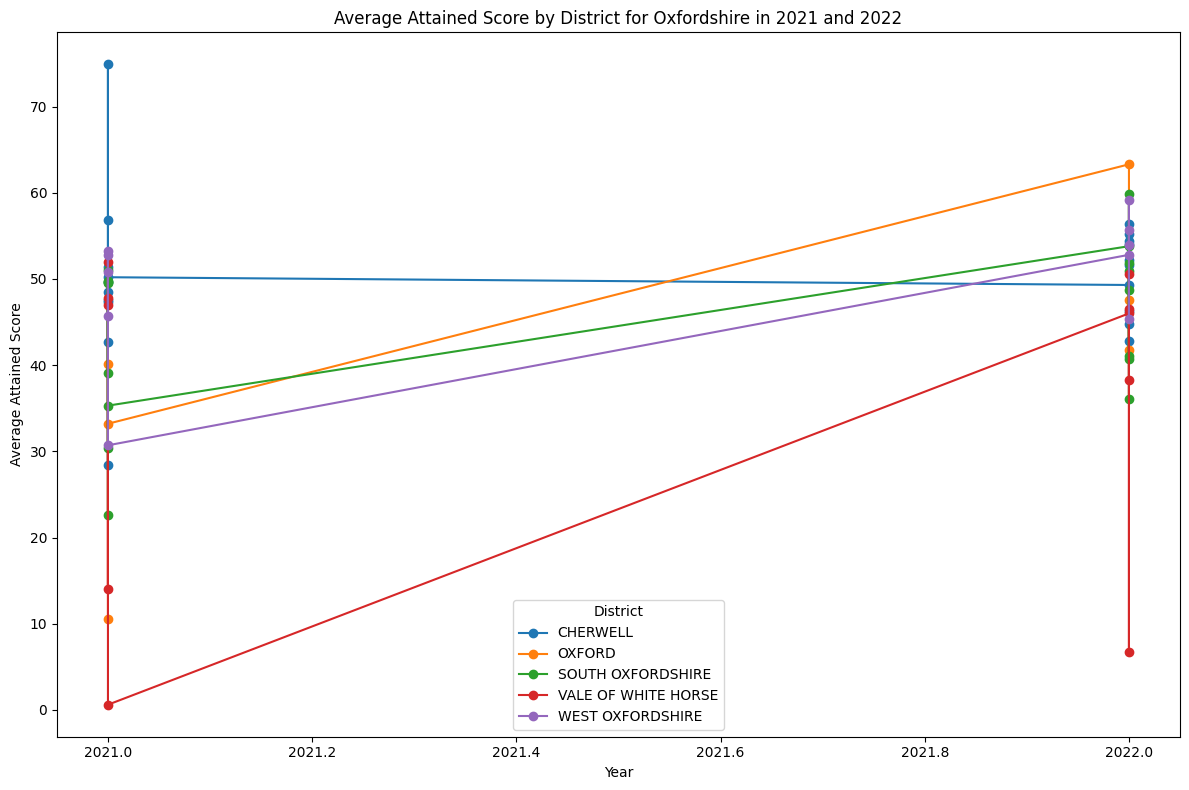

In [195]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=school_data_concat_ox, x='Year', y='Attained', hue='District', marker='o')
plt.xlabel('Year')
plt.ylabel('Average Attained Score')
plt.title('Average Attained Score by District for Oxfordshire in 2021 and 2022')
plt.legend(title='District', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [140]:
school_data_merged.head()

,District,Short Post Code,County,Price,Post Code,School,Attained,Year
0,LEEDS,LS8,WEST YORKSHIRE,283334,LS8 1ND,Roundhay School,52.8,2022
1,WAKEFIELD,WF4,WEST YORKSHIRE,202500,WF4 1NF,Crofton Academy,49.1,2022
2,KIRKLEES,WF13,WEST YORKSHIRE,78000,WF13 4LL,St John Fisher Catholic Voluntary Academy,37.9,2022
3,KIRKLEES,WF12,WEST YORKSHIRE,135000,WF12 9NG,Institute of Islamic Education,59.3,2022
4,BRADFORD,LS29,WEST YORKSHIRE,110400,LS29 8TR,Ilkley Grammar School,62.7,2022


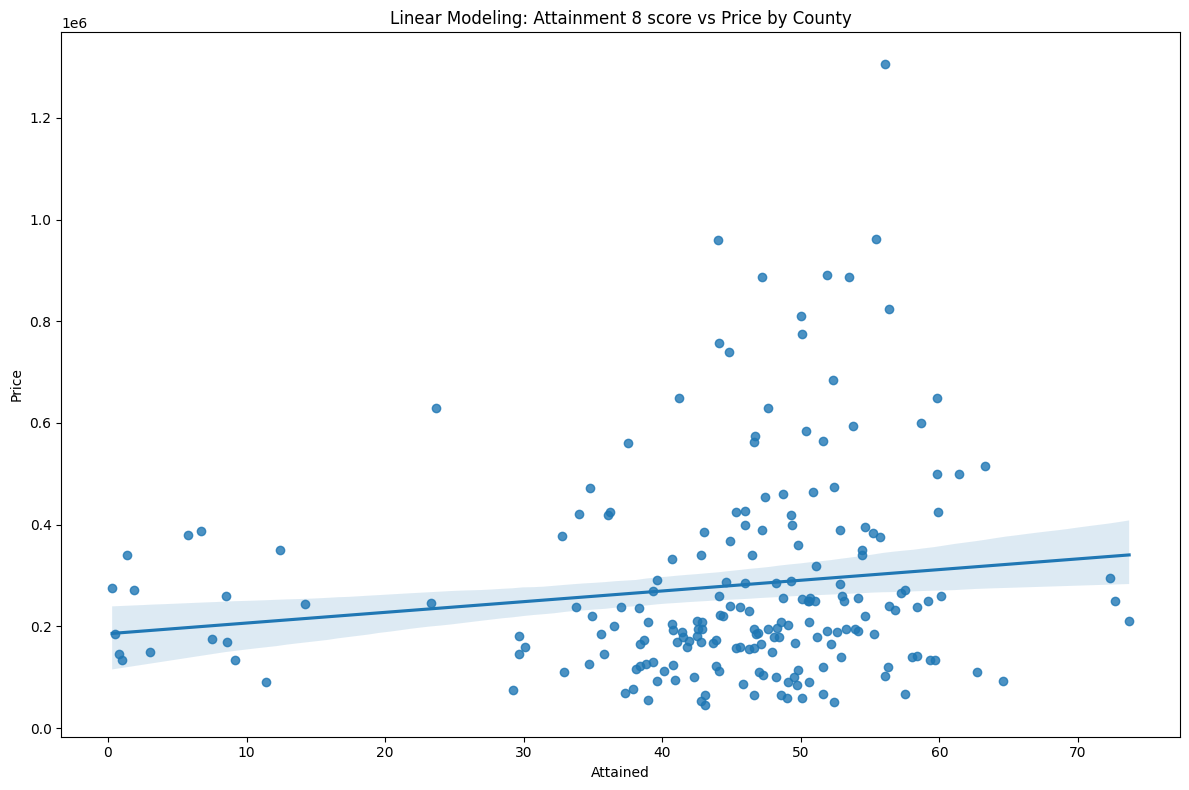

In [213]:
plt.figure(figsize=(12, 8))

values_to_replace = ['WEST YORKSHIRE', 'EAST RIDING OF YORKSHIRE', 'SOUTH YORKSHIRE', 'NORTH YORKSHIRE']
replacement_value = 'YORKSHIRE'

pattern = '|'.join(values_to_replace)
school_data_merged['County'] = school_data_merged['County'].str.replace(pattern, replacement_value, case=False)

sns.regplot(x='Attained', y='Price', data=school_data_merged, scatter=True)

plt.xlabel('Attained')
plt.ylabel('Price')
plt.title('Linear Modeling: Attainment 8 score vs Price by County')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [183]:
broadBand_coverage = pd.read_csv('data/Broadband/BroadbandCleaned/broadband_filtered_performance_all.csv')
broadBand_coverage['Short Post Code'] = broadBand_coverage['postcode_space'].str.split().str[0]
broadBand_coverage.isna()
school_broadband_housing = school_data_merged.merge(broadBand_coverage,left_on='Post Code', right_on='postcode_space',how= 'inner')


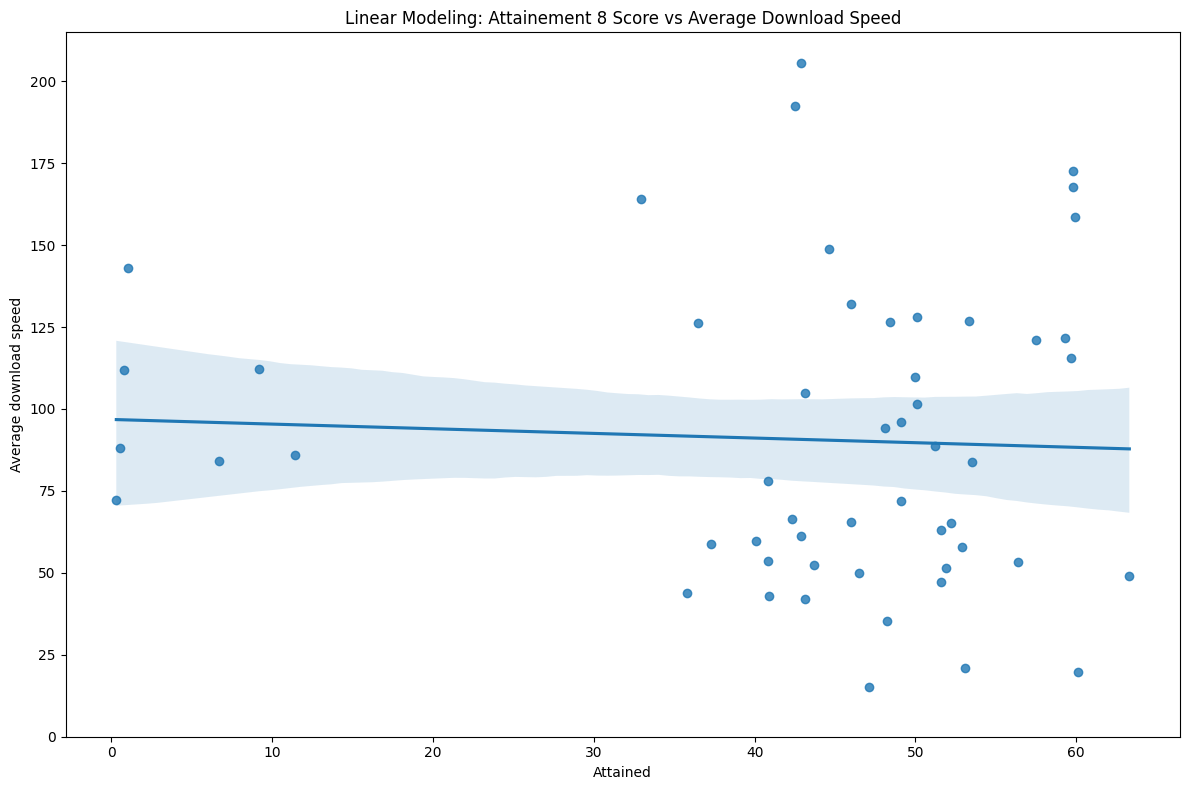

In [214]:
plt.figure(figsize=(12, 8))

sns.regplot(x='Attained', y='Average download speed (Mbit/s)', data=school_broadband_housing, scatter=True)

plt.xlabel('Attained')
plt.ylabel('Average download speed')
plt.title('Linear Modeling: Attainement 8 Score vs Average Download Speed')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.ylim(0)  
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


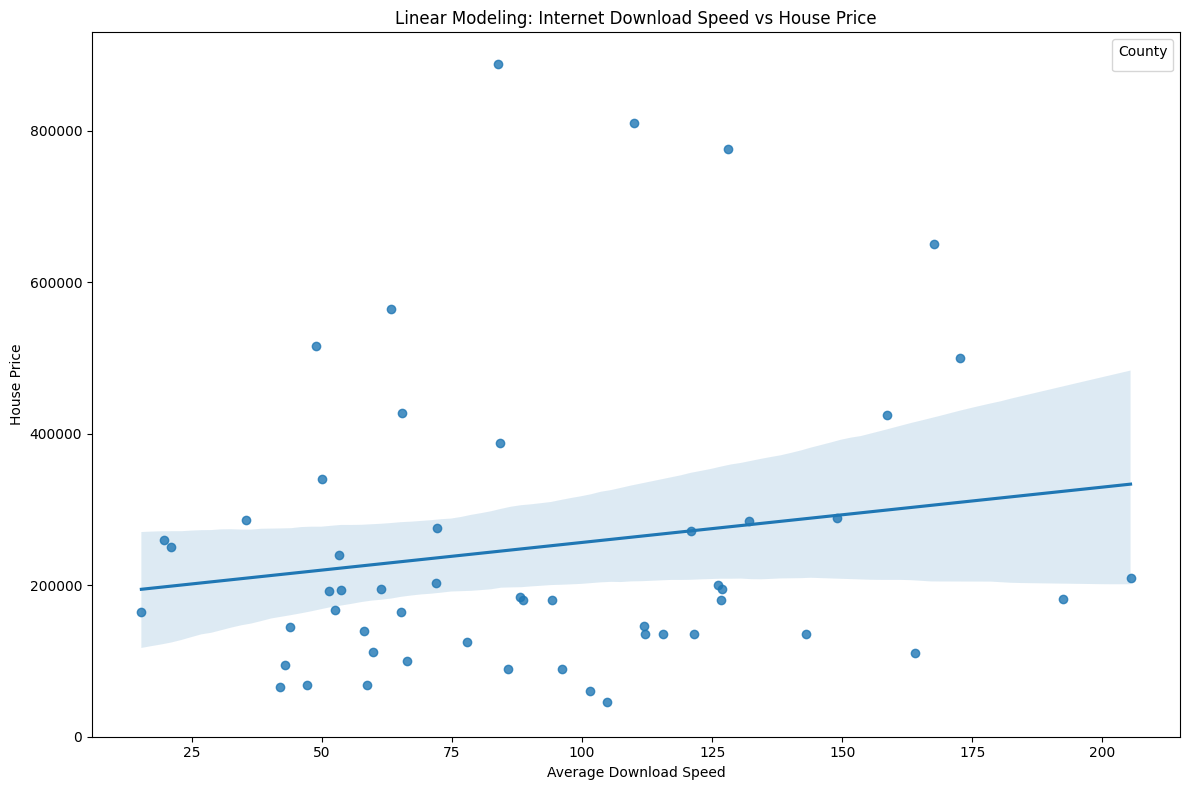

In [212]:
z_scores = np.abs((school_broadband_housing['Average download speed (Mbit/s)'] - school_broadband_housing['Average download speed (Mbit/s)'].mean()) / school_broadband_housing['Average download speed (Mbit/s)'].std())
z_threshold = 3
school_broadband_housing = school_broadband_housing[z_scores <= z_threshold]

plt.figure(figsize=(12, 8))

sns.regplot(x='Average download speed (Mbit/s)', y='Price', data=school_broadband_housing, scatter=True)

plt.xlabel('Average Download Speed')
plt.ylabel('House Price')
plt.title('Linear Modeling: Internet Download Speed vs House Price')
plt.legend(title='County', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0)
plt.tight_layout()
plt.show()